# Question 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from gmplot import gmplot
from matplotlib.pyplot import figure
import datetime
from IPython.display import IFrame

In [2]:
baltimore = pd.read_csv('./baltimore_crimes.csv')
baltimore

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
0,09/01/2015,23:58:00,4C,600 S PACA ST,AGG. ASSAULT,OTHER,941.0,SOUTHERN,Ridgely's Delight,"(39.283010000000, -76.624750000000)",1
1,09/01/2015,23:36:00,6J,1000 EVANS WAY,LARCENY,NaN,433.0,NORTHEASTERN,Armistead Gardens,"(39.304860000000, -76.545180000000)",1
2,09/01/2015,23:30:00,4B,300 W CAMDEN,AGG. ASSAULT,KNIFE,941.0,CENTRAL,Stadium Area,"(39.285230000000, -76.619700000000)",1
3,09/01/2015,23:30:00,6D,1100 RACE ST,LARCENY FROM AUTO,NaN,942.0,SOUTHERN,Sharp-Leadenhall,"(39.276100000000, -76.616710000000)",1
4,09/01/2015,22:25:00,4E,1000 WASHINGTON BLVD,COMMON ASSAULT,NaN,932.0,SOUTHERN,Washington Village/Pigtow,"(39.282900000000, -76.631890000000)",1
5,09/01/2015,22:00:00,6E,1400 W FAYETTE ST,LARCENY,NaN,711.0,WESTERN,Franklin Square,"(39.289740000000, -76.639730000000)",1
6,09/01/2015,22:00:00,7A,500 DOLPHIN ST,AUTO THEFT,NaN,123.0,CENTRAL,Upton,"(39.300540000000, -76.628280000000)",1
7,09/01/2015,21:30:00,6D,3700 TOONE ST,LARCENY FROM AUTO,NaN,232.0,SOUTHEASTERN,Canton,"(39.278500000000, -76.566770000000)",1
8,09/01/2015,21:00:00,5A,500 S CHESTER ST,BURGLARY,NaN,232.0,SOUTHEASTERN,Canton,"(39.285520000000, -76.587000000000)",1
9,09/01/2015,21:00:00,6E,2900 WILKENS AVE,LARCENY,NaN,832.0,SOUTHWESTERN,Wilhelm Park,"(39.275870000000, -76.665120000000)",1


## Part 1

In [3]:
district_count = {}
for value in baltimore['District']:
    if value not in district_count.keys():
        district_count[value] = 1
    else:
        district_count[value] += 1
district_count

{'CENTRAL': 1593,
 'EASTERN': 800,
 'NORTHEASTERN': 51,
 'SOUTHEASTERN': 2828,
 'SOUTHERN': 1920,
 'SOUTHWESTERN': 1551,
 'WESTERN': 898}

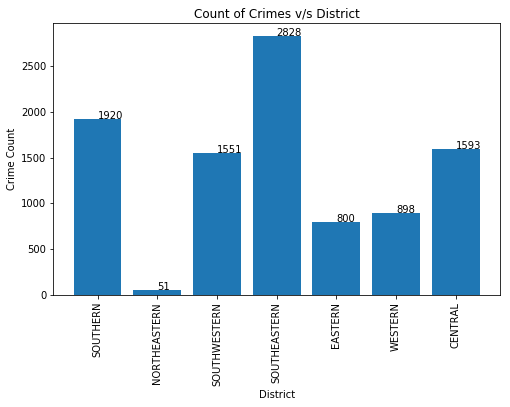

In [4]:
plt.figure(figsize = (8, 5))
plt.xticks(rotation = 90)
plt.bar(district_count.keys(), district_count.values())
plt.xlabel('District')
plt.ylabel('Crime Count')
plt.title('Count of Crimes v/s District')
for x, y in zip(district_count.keys(), district_count.values()):
    plt.text(x, y, str(y))

### Most Number of Incidents - `Southeastern`
### Least Number of Incidents - `Northeastern`

## Part 2

In [5]:
location = baltimore['Location 1']
lats, longs = [], []
for item in location:
    lat, long = item.strip('()').split(',')
    lats.append(float(lat))
    longs.append(float(long.strip()))

gmap = gmplot.GoogleMapPlotter(39.299236, -76.609383, 13)
gmap.heatmap(lats, longs)
gmap.draw('./index.html')

IFrame(src = "index.html", width = 900, height = 500)

### The crime is spread unevenly across the city. Near Gordon Ramsy Steak, there is a red spot indicating more crime density at that spot. We can alse see a bit of redness near Royal Farms.

## Part 3

In [6]:
time_dict = {}
crime_type = {}
for index, row in baltimore.iterrows():
    code = row['Description']
    hour = row['CrimeTime'].split(':')[0]
    if len(hour) > 2:
        hour = hour[:2]
    hour_key = hour + ':00-' + hour + ':59'
    if hour_key not in crime_type.keys():
        crime_type[hour_key] = {}
        crime_type[hour_key][code] = 1
    else:
        if code not in crime_type[hour_key].keys():
            crime_type[hour_key][code] = 1
        else:
            crime_type[hour_key][code] += 1
    if hour_key not in time_dict.keys():
        time_dict[hour_key] = 1
    else:
        time_dict[hour_key] += 1
time_dict, crime_type

({'00:00-00:59': 381,
  '01:00-01:59': 403,
  '02:00-02:59': 263,
  '03:00-03:59': 189,
  '04:00-04:59': 136,
  '05:00-05:59': 132,
  '06:00-06:59': 144,
  '07:00-07:59': 247,
  '08:00-08:59': 344,
  '09:00-09:59': 329,
  '10:00-10:59': 396,
  '11:00-11:59': 413,
  '12:00-12:59': 444,
  '13:00-13:59': 422,
  '14:00-14:59': 487,
  '15:00-15:59': 521,
  '16:00-16:59': 558,
  '17:00-17:59': 603,
  '18:00-18:59': 611,
  '19:00-19:59': 588,
  '20:00-20:59': 554,
  '21:00-21:59': 593,
  '22:00-22:59': 472,
  '23:00-23:59': 411},
 {'00:00-00:59': {'AGG. ASSAULT': 61,
   'ARSON': 6,
   'ASSAULT BY THREAT': 1,
   'AUTO THEFT': 47,
   'BURGLARY': 43,
   'COMMON ASSAULT': 68,
   'HOMICIDE': 1,
   'LARCENY': 50,
   'LARCENY FROM AUTO': 40,
   'RAPE': 4,
   'ROBBERY - CARJACKING': 2,
   'ROBBERY - COMMERCIAL': 4,
   'ROBBERY - RESIDENCE': 5,
   'ROBBERY - STREET': 45,
   'SHOOTING': 4},
  '01:00-01:59': {'AGG. ASSAULT': 59,
   'ARSON': 5,
   'ASSAULT BY THREAT': 4,
   'AUTO THEFT': 45,
   'BURGLARY

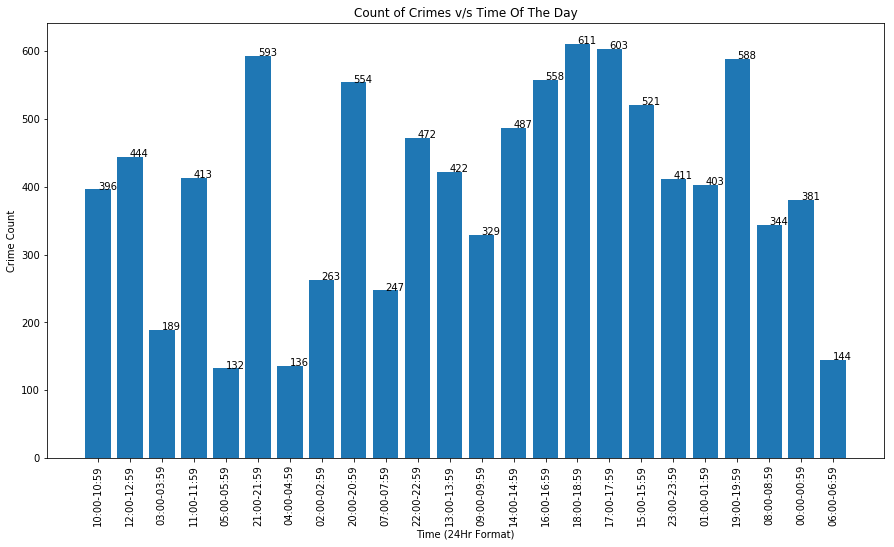

In [7]:
plt.figure(figsize = (15, 8))
plt.xticks(rotation = 90)
plt.bar(time_dict.keys(), time_dict.values())
plt.xlabel('Time (24Hr Format)')
plt.ylabel('Crime Count')
plt.title('Count of Crimes v/s Time Of The Day')
for x, y in zip(time_dict.keys(), time_dict.values()):
    plt.text(x, y, str(y))

In [8]:
crime_count = {}
for key in crime_type:
    if key in ['20:00-20:59', '21:00-21:59', '22:00-22:59', '23:00-23:59']:
        for crime in crime_type[key]:
            if crime not in crime_count.keys():
                crime_count[crime] = crime_type[key][crime]
            else:
                crime_count[crime] += crime_type[key][crime]
crime_count

{'AGG. ASSAULT': 216,
 'ARSON': 7,
 'ASSAULT BY THREAT': 13,
 'AUTO THEFT': 241,
 'BURGLARY': 238,
 'COMMON ASSAULT': 291,
 'HOMICIDE': 18,
 'LARCENY': 350,
 'LARCENY FROM AUTO': 358,
 'RAPE': 9,
 'ROBBERY - CARJACKING': 22,
 'ROBBERY - COMMERCIAL': 30,
 'ROBBERY - RESIDENCE': 15,
 'ROBBERY - STREET': 187,
 'SHOOTING': 35}

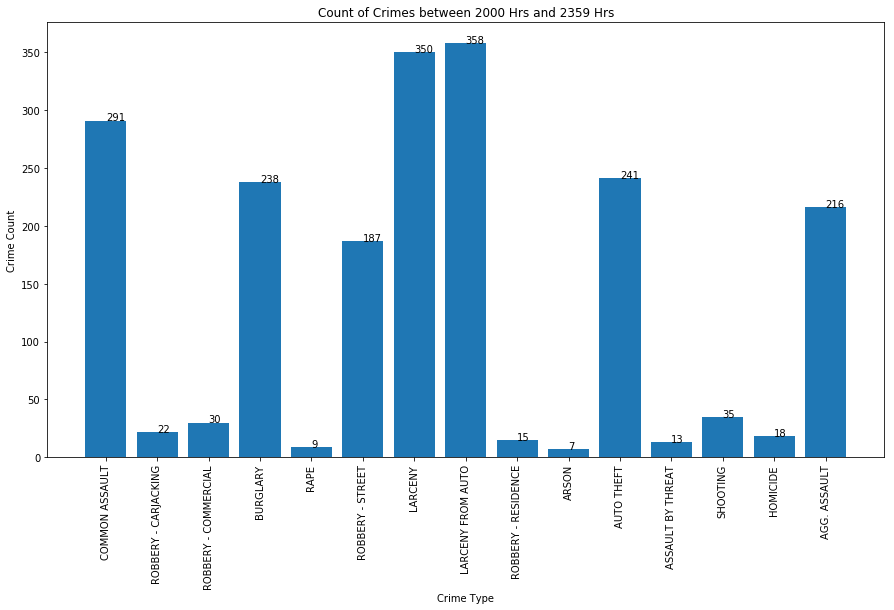

In [9]:
plt.figure(figsize = (15, 8))
plt.xticks(rotation = 90)
plt.bar(crime_count.keys(), crime_count.values())
plt.xlabel('Crime Type')
plt.ylabel('Crime Count')
plt.title('Count of Crimes between 2000 Hrs and 2359 Hrs')
for x, y in zip(crime_count.keys(), crime_count.values()):
    plt.text(x, y, str(y))

### It can be seen from the above plot that `Larceny From Auto` has the maximum count.
### Thus, `Larceny From Auto` is most likely to occur between 2000 Hrs to 2359 Hrs.

In [10]:
day_dict = {}
for index, row in baltimore.iterrows():
    date = row['CrimeDate']
    mm, dd, yyyy = [int(x) for x in date.split('/')]
    day = datetime.date(yyyy, mm, dd).strftime('%A')
    if day not in day_dict.keys():
        day_dict[day] = 1
    else:
        day_dict[day] += 1
day_dict

{'Friday': 1433,
 'Monday': 1366,
 'Saturday': 1375,
 'Sunday': 1369,
 'Thursday': 1331,
 'Tuesday': 1459,
 'Wednesday': 1308}

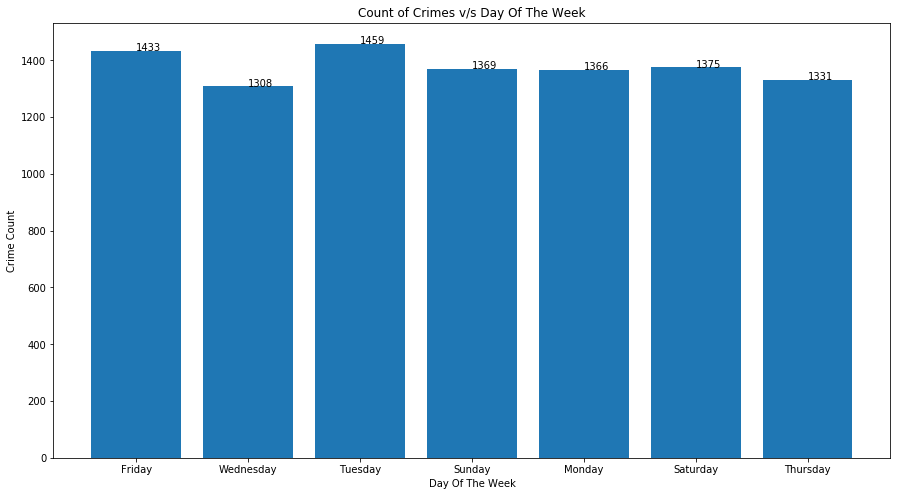

In [11]:
plt.figure(figsize = (15, 8))
plt.bar(day_dict.keys(), day_dict.values())
plt.xlabel('Day Of The Week')
plt.ylabel('Crime Count')
plt.title('Count of Crimes v/s Day Of The Week')
for x, y in zip(day_dict.keys(), day_dict.values()):
    plt.text(x, y, str(y))

### It can be seen from the above graph, most number of crimes occur on `Tuesday`.

## Part 4

In [12]:
crime_freq = {}
for key in crime_type:
    for crime in crime_type[key]:
        if crime not in crime_freq.keys():
            crime_freq[crime] = crime_type[key][crime]
        else:
            crime_freq[crime] += crime_type[key][crime]
crime_freq

{'AGG. ASSAULT': 902,
 'ARSON': 49,
 'ASSAULT BY THREAT': 104,
 'AUTO THEFT': 904,
 'BURGLARY': 1506,
 'COMMON ASSAULT': 1424,
 'HOMICIDE': 64,
 'LARCENY': 2153,
 'LARCENY FROM AUTO': 1394,
 'RAPE': 47,
 'ROBBERY - CARJACKING': 63,
 'ROBBERY - COMMERCIAL': 174,
 'ROBBERY - RESIDENCE': 71,
 'ROBBERY - STREET': 677,
 'SHOOTING': 109}

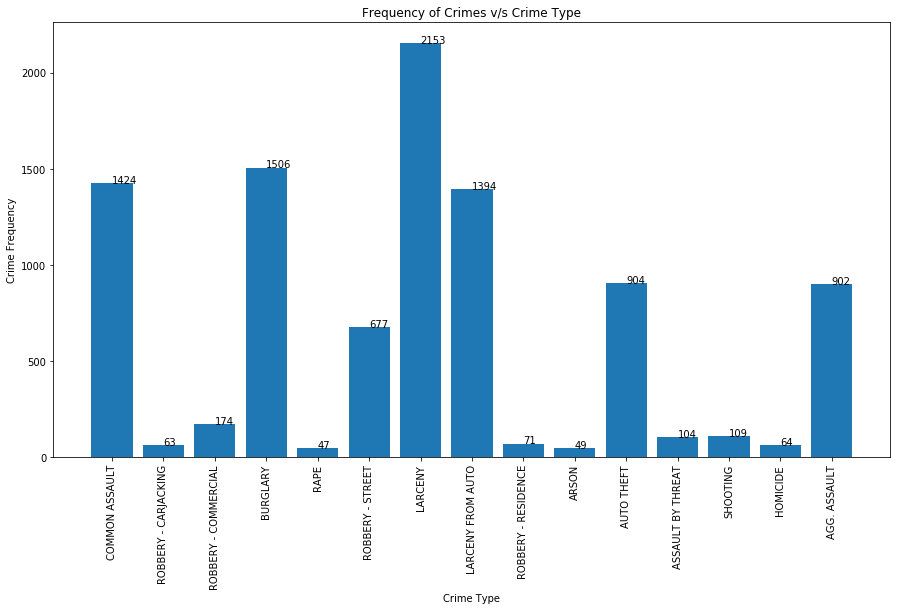

In [13]:
plt.figure(figsize = (15, 8))
plt.xticks(rotation = 90)
plt.bar(crime_freq.keys(), crime_freq.values())
plt.xlabel('Crime Type')
plt.ylabel('Crime Frequency')
plt.title('Frequency of Crimes v/s Crime Type')
for x, y in zip(crime_freq.keys(), crime_freq.values()):
    plt.text(x, y, str(y))

### As seen from plot above, `Larceny` is the most frequent crime.

In [14]:
most_freq_crime_data = baltimore[baltimore['Description'] == 'LARCENY']
freq_crime_time_dict = {}
larceny_lats, larceny_longs = [], []
for index, row in most_freq_crime_data.iterrows():
    hour = row['CrimeTime'].split(':')[0]
    lat, long = row['Location 1'].strip('()').split(',')
    larceny_lats.append(float(lat))
    larceny_longs.append(float(long.strip()))
    if len(hour) > 2:
        hour = hour[:2]
    hour_key = hour + ':00-' + hour + ':59'
    if hour_key not in freq_crime_time_dict.keys():
        freq_crime_time_dict[hour_key] = 1
    else:
        freq_crime_time_dict[hour_key] += 1

freq_crime_time_dict

{'00:00-00:59': 50,
 '01:00-01:59': 67,
 '02:00-02:59': 26,
 '03:00-03:59': 21,
 '04:00-04:59': 25,
 '05:00-05:59': 24,
 '06:00-06:59': 24,
 '07:00-07:59': 50,
 '08:00-08:59': 73,
 '09:00-09:59': 92,
 '10:00-10:59': 116,
 '11:00-11:59': 137,
 '12:00-12:59': 134,
 '13:00-13:59': 119,
 '14:00-14:59': 127,
 '15:00-15:59': 145,
 '16:00-16:59': 160,
 '17:00-17:59': 159,
 '18:00-18:59': 140,
 '19:00-19:59': 114,
 '20:00-20:59': 106,
 '21:00-21:59': 109,
 '22:00-22:59': 75,
 '23:00-23:59': 60}

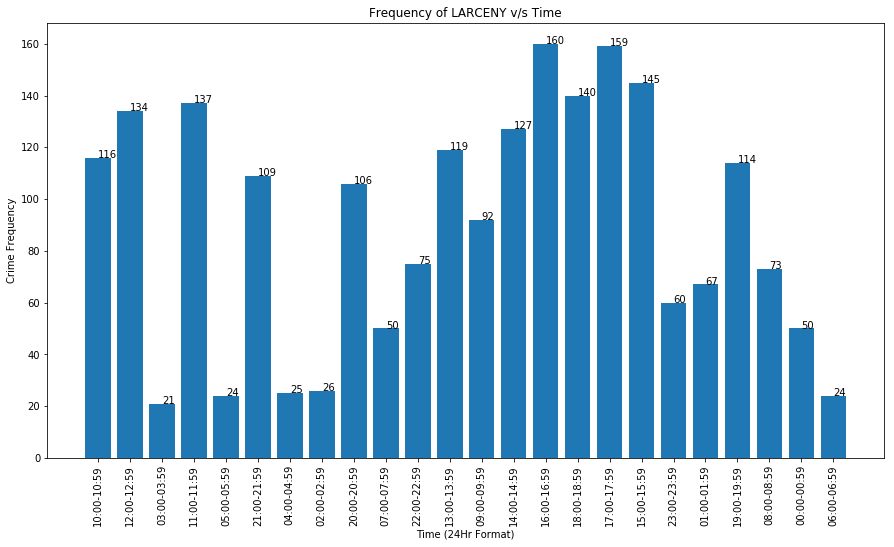

In [15]:
plt.figure(figsize = (15, 8))
plt.xticks(rotation = 90)
plt.bar(freq_crime_time_dict.keys(), freq_crime_time_dict.values())
plt.xlabel('Time (24Hr Format)')
plt.ylabel('Crime Frequency')
plt.title('Frequency of LARCENY v/s Time')
for x, y in zip(freq_crime_time_dict.keys(), freq_crime_time_dict.values()):
    plt.text(x, y, str(y))

### It can be seen that the most common crime, i.e. `Larceny`, happens most at `16:00 - 17:59`.

In [16]:
gmap = gmplot.GoogleMapPlotter(39.299236, -76.609383, 13)
gmap.heatmap(larceny_lats, larceny_longs)
gmap.draw('./index1.html')

IFrame(src = "index1.html", width = 900, height = 500)

### From the heatmap we can see that `Larceny` crime is more concentrated in the centre of Baltimore. 
### There is a bit of redness near `Wendy's` and `Five Below`.
### A bit of yellowness can be found on the `East Side` of Baltimore.